In [94]:
import pandas as pd

problem_map = pd.read_csv('../data/factors.csv')

problem_map

,From,To
0,Великі витрати матеріалів та сировини,Висока собівартість продукції
1,Висока собівартість продукції,Недостатність власних засобів
2,Висока собівартість продукції,Низький попит на продукцію
3,Значна частка пасивної частини ОФ,Висока собівартість продукції
4,Мала частка ТНВ в обсязі продукції,Низький попит на продукцію
5,Недостатній аналіз ринку,Низький попит на продукцію
6,Недостатній аналіз ринку,Мала частка ТНВ в обсязі продукції
7,Недостатність власних засобів,Низький ступінь оновлення продукції
8,Недостатність власних засобів,Старіння оборотних фондів ОФ
9,Низька виконавча дисципліна,Висока собівартість продукції


# Хід роботи

1. Побудуємо карту проблеми, яка відображає основні взаємозв’язки причин і наслідків проблемної ситуації.

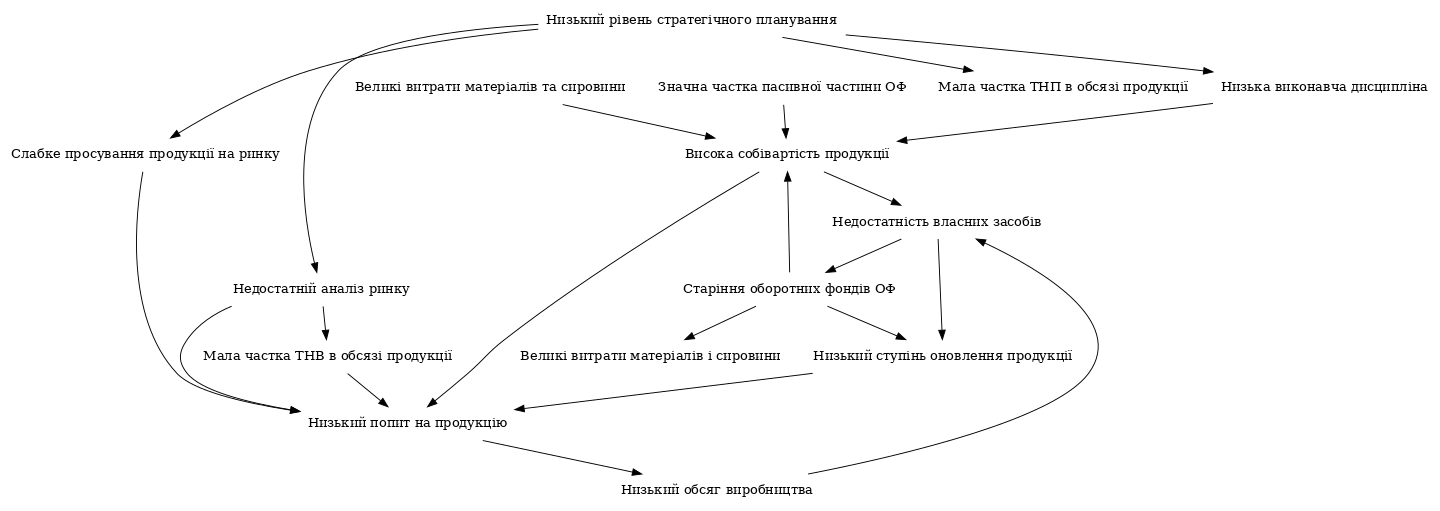

In [95]:
import graphviz # for visualizing the graph
from IPython.display import display, Markdown # for displaying the graph in the notebook
from IPython import display as render
import numpy as np # for manipulating arrays
import ast  # for converting embeddings saved as strings back to arrays
from openai import OpenAI # for calling the OpenAI API
import pandas as pd  # for storing text and embeddings data
import os # for getting API token from env variable OPENAI_API_KEY
from scipy import spatial  # for calculating vector similarities for search
from dotenv import load_dotenv # for loading environment variables from .env file

load_dotenv()

graphviz.set_jupyter_format('svg')

G = graphviz.Digraph()

G.attr(rankdir='TB', size='15')
G.attr('node', shape='plaintext')

# add the vertices
[G.node(str(x)) for x in np.unique(problem_map[['From', 'To']].values.flatten())]
# add the edges
[G.edge(str(x[1][0]), str(x[1][1])) for x in problem_map.iterrows()]

render.Image(G.pipe(format='png'))


## За допомогою ChatGPT завантажуємо та аналізуємо карту проблем, та отримуємо відповіді на питання

In [96]:
GPT_MODEL = "gpt-4"

openai = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

def query_message(
    query: str
) -> str:
    message = f"""
    Об’єктом дослідження буде підприємство “Вітара”. ВАТ “Вітара” – це компанія середнього масштабу, яка виготовляє електродвигуни та насоси, а також товари народного споживання. Останнім часом компанія мала високу репутацію завдяки високій якості продукції та сервісу. Однак ситуація змінилася.

    По-перше, різко скоротилася кількість замовлень на основну продукцію підприємства – електродвигуни для насосних станцій. При цьому зменшення платоспроможного попиту супроводжувалося підвищенням вимог замовників до характеристик продукції.

    По-друге, була здійснена приватизація. З цього часу розвиток виробництва необхідно було здійснювати вже не за рахунок централізованих джерел, а за рахунок самостійно зароблених коштів. Як наслідок – упродовж останніх років компанія звітує про збитки.
    
    Про стан підприємства свідчать такі цифри: половина основних фондів експлуатується понад 25 років; номенклатура продукції заводу оновлюється щорічно тільки на 1-2 %; рівень витрат на 1 грн. продукції становить 90 коп. при плані 75 коп.
   
    Проаналізуй карту проблем для ВАТ “Вітара”, що наведено далі у DOT форматі
    
    ```
    {problem_map}
    ```
    
    Якщо відповідь не може бути знайдена, напиши "Я не можу надати відповідь на ваш запит."
    """
    question = f"\n\nПитання: {query}"
    
    return message + question


def ask(
    query: str,
    print_message: bool = False,
) -> str:
    """Відповідь на запит, використовуючи GPT"""
    message = query_message(query)
    if print_message:
        print(message)
    messages = [
        {"role": "system", "content": "Ви відповідаєте на запитання про підприємство ВАТ Вітара"},
        {"role": "user", "content": message},
    ]
    response = openai.chat.completions.create(
        model=GPT_MODEL,
        messages=messages,
        temperature=0
    )
    response_message = response.choices[0].message.content
    return response_message

In [97]:
result = ask('Які 3 ключові причинно-наслідкових зв’язки? Відповідь надай нумерованим списком.')
print(result)

1. Великі витрати матеріалів та сировини ведуть до високої собівартості продукції. Це, в свою чергу, призводить до недостатності власних засобів і низького попиту на продукцію.

2. Недостатній аналіз ринку призводить до низького попиту на продукцію і малої частки товарів народного споживання в обсязі продукції.

3. Старіння оборотних фондів об'єктів фіксованого активу призводить до високої собівартості продукції, великих витрат матеріалів і сировини, а також низького ступеня оновлення продукції.


In [104]:
result = ask('Які 3 основні завдання антикризового управління ВАТ Вітара? Відповідь надай нумерованим списком.')
print(result)

На основі наведеної інформації, можна визначити наступні три основні завдання антикризового управління ВАТ "Вітара":

1. Зниження витрат на виробництво: ВАТ "Вітара" має великі витрати на матеріали та сировину, що призводить до високої собівартості продукції. Отже, одним з основних завдань є оптимізація виробничого процесу та зниження витрат.

2. Підвищення якості та оновлення продукції: Згідно з даними, номенклатура продукції заводу оновлюється лише на 1-2% щорічно. Це може бути однією з причин зниження попиту на продукцію. Тому другим завданням є розробка нових продуктів або модернізація існуючих, щоб відповідати вимогам ринку.

3. Покращення стратегічного планування та аналізу ринку: Низький рівень стратегічного планування та недостатній аналіз ринку також впливають на ефективність підприємства. Тому третім завданням є розробка ефективної стратегії розвитку та проведення глибокого аналізу ринку для визначення потреб споживачів та конкурентного середовища.


In [99]:
result = ask('Які 2 відносно незалежні підсистеми чинників, включаючи елементи, які сприяють погіршенню кризового становища у ВАТ “Вітара”? Відповідь надай нумерованим списком.')
print(result)

1. Підсистема внутрішніх проблем:
    - Великі витрати матеріалів та сировини
    - Висока собівартість продукції
    - Значна частка пасивної частини основних фондів
    - Мала частка товарів народного споживання в обсязі продукції
    - Недостатність власних засобів
    - Низька виконавча дисципліна
    - Низький ступінь оновлення продукції
    - Старіння оборотних фондів основних фондів

2. Підсистема зовнішніх проблем:
    - Недостатній аналіз ринку
    - Низький обсяг виробництва
    - Низький попит на продукцію
    - Низький рівень стратегічного планування
    - Слабке просування продукції на ринку


In [100]:
result = ask('Який склад петель зворотного зв’язку між кризовими факторами у ВАТ “Вітара”? Виділи назви петель жирним, елементи що входять у петлю перелічи у підпунктах, відповідь надай нумерованим списком.')
display(Markdown(result))

На основі наведеної таблиці можна виділити наступні петлі зворотного зв'язку між кризовими факторами у ВАТ "Вітара":

1. **Петля "Висока собівартість продукції"**
    - Великі витрати матеріалів та сировини
    - Висока собівартість продукції
    - Недостатність власних засобів
    - Старіння оборотних фондів ОФ
    - Великі витрати матеріалів і сировини

2. **Петля "Низький попит на продукцію"**
    - Висока собівартість продукції
    - Низький попит на продукцію
    - Низький обсяг виробництва
    - Недостатність власних засобів
    - Старіння оборотних фондів ОФ
    - Великі витрати матеріалів і сировини

3. **Петля "Недостатній аналіз ринку"**
    - Недостатній аналіз ринку
    - Низький попит на продукцію
    - Низький обсяг виробництва
    - Недостатність власних засобів
    - Старіння оборотних фондів ОФ
    - Великі витрати матеріалів і сировини

4. **Петля "Низький рівень стратегічного планування"**
    - Низький рівень стратегічного планування
    - Низька виконавча дисципліна
    - Висока собівартість продукції
    - Недостатність власних засобів
    - Старіння оборотних фондів ОФ
    - Великі витрати матеріалів і сировини

Ці петлі зворотного зв'язку вказують на взаємозв'язок між різними проблемами підприємства, що може ускладнити процес їх вирішення.

In [101]:
result = ask('Які причини недостатності власних фінансових коштів підприємства?')
print(result)

На основі наведеної карти проблем, причинами недостатності власних фінансових коштів підприємства є висока собівартість продукції та низький обсяг виробництва.


In [105]:
result = ask('Які 3 альтернативні варіанти вирішення проблеми недостатності власних фінансових коштів ВАТ Вітара через високу собівартість продукції та низький обсяг виробництва? Відповідь сформуй у вигляді таблиці з колонками: проблема, варіант вирішення, критерії оцінювання, оцінка за 10-ти бальною шкалою кожного критерія та обгрунтування, сумарна оцінка за всією множиною критеріїв.')
display(Markdown(result))

| Проблема | Варіант вирішення | Критерії оцінювання | Оцінка за 10-ти бальною шкалою | Обгрунтування | Сумарна оцінка |
| --- | --- | --- | --- | --- | --- |
| Висока собівартість продукції | Оптимізація виробничого процесу | Вартість, ефективність, швидкість впровадження | 7, 8, 6 | Може зменшити витрати, але потребує часу на впровадження | 21 |
| Низький обсяг виробництва | Розширення ринку збуту | Вартість, ефективність, швидкість впровадження | 6, 9, 7 | Може збільшити обсяги виробництва, але потребує інвестицій в маркетинг | 22 |
| Недостатність власних засобів | Залучення інвестицій | Вартість, ефективність, швидкість впровадження | 8, 7, 9 | Може забезпечити необхідні кошти, але потребує часу на пошук інвесторів | 24 |

Висновок: Найбільш ефективним варіантом вирішення проблеми недостатності власних фінансових коштів ВАТ Вітара є залучення інвестицій, оскільки це дає найвищу сумарну оцінку за всіма критеріями.

# Висновки

У даній лабораторній роботі ми використали OpenAI API (модель GPT-4) для виконання завдань лабораторної роботи. Було продемонстровано застосування "штучного інтелекту" для виконання і створено прототип алгоритму для аналізу аналогічних задач.

Роботу можна доопрацювати, наприклад покращити відобрадення карти проблем і виділити (або створити інтерактивну модель) для відображення:
- кластерів
- петель зворотнього зв'язку
- виділення відносно незалежних підсистем чинників та їх елементів

Незважаючи на чудовий фінальний результат у таблиці, для власного підприємства я би використовував би тільки як додаткову інформацію для прийняття рішення.
